## DSO 424: HW 1 (Global Warming)

Global warming research has been very active. We will be looking at Nenana.txt, which consists of data that marks the "unofficial start of spring" for every year from 1917-2003.

The original txt file is from the link given above, but it is password encrypted.
Thus, we will change the .txt file to .csv file manually and read the file from the same directory.

Source:
https://daacdata.apps.nsidc.org/pub/DATASETS/NENANA/


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Read the csv file
nenana = pd.read_csv("nenana.csv")

## Defining our KPI

We want to know the global warming trend from 1917-2003. Since nenana.csv contains a list of "unffocial" start of spring each year, we will be defining out KPI as the # of days it takes for each year to get to spring.

In [3]:
# Month dictionary
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

In [4]:
# Get the dates column
dates = []
for i in nenana["Date & Time"]:
    dates.append(str(i))

In [5]:
# Get the month and list column and assign it to months and days lists
# These will be used as our input for datetime object
# Each months and days list has 87 rows

months = []
days = []

for i in dates:
    space = 0
    month = ""
    day = ""
    
    for j in i:
        if j == " ":
            space += 1
        elif not j.isdigit():
            month += j
        elif j.isdigit():
            day += j
        if space == 2:
            days.append(int(day))
            months.append(month_dict[month])
            break

In [6]:
# Get the Year column
# This will be used as our x-axis
years = list(nenana['Year'])

In [7]:
# Getting rid of 2004 at the end for 87 rows
nenana = nenana[:len(nenana)-1]

In [8]:
# Get the days it takes to get to spring every year
spring_list = []
for i in range(len(months)):
    date_spring = datetime(years[i], months[i], days[i]) - datetime(years[i], 1, 1)
    spring_list.append(date_spring.days)

In [9]:
# Attach "Spring_Days" column in nenana
nenana["Spring_Days"] = spring_list
nenana

,Year,Date & Time,Spring_Days
0,1917,April 30 at 11:30 AM,119
1,1918,May 11 at 9:33 AM,130
2,1919,May 3 at 2:33 PM,122
3,1920,May 11 at 10:46 AM,131
4,1921,May 11 at 6:42 AM,130
...,...,...,...
82,1999,April 29 at 9:47 PM,118
83,2000,May 1 at 10:47 AM,121
84,2001,May 8 at 1:00 PM,127
85,2002,May 7 at 9:27 PM,126


## Discovering the Data Trend
Now that we have our KPI column, we can use it to find the global warming trend.
We are going to find the mean # of days it took for spring to start from 1917-1959 and 1960-2003.

In [10]:
# We are going to find out the mean number of days it took to get to spring before 1960 and starting from 1960
# Get two data frames, starting from 1917-1959 and 1960-2003

earlier = nenana.loc[nenana['Year'] < 1960]
later = nenana.loc[nenana['Year'] >= 1960]

In [11]:
# Find the mean for "earlier" list and "later" list

early_mean = earlier['Spring_Days'].mean()
late_mean = later['Spring_Days'].mean()

In [12]:
# We are planning to draw two horizontal lines that signify the "earlier mean" and "later mean"
# The matplotlib library only allows us to input matrices with equal dimensions.
# Thus, we have to make sure that the earlier_mean_list and later_mean_list have the same length (87)
# Ex) For earlier_mean_list, we fill out the list with earlier_mean up to 1959 and the rest with None

early_mean_list = []
late_mean_list = []

for i in range(1917, 2004):
    if i < 1960:
        early_mean_list.append(early_mean)
        late_mean_list.append(None)
    else:
        early_mean_list.append(None)
        late_mean_list.append(late_mean)

In [13]:
print("Mean # of days for spring to start: ")
print("1917-1959:", round(early_mean, 2), "days")
print("1960-2003:", round(late_mean, 2), "days")

Mean # of days for spring to start: 
1917-1959: 124.93 days
1960-2003: 122.98 days


Based on my graph of Global Warming Pattern, the average number of days it took to get to spring before 1960 was about 123 days while the same KPI for for 1960-2003 was estimated to be about 125 days. The global warming may have been the cause for the difference in days it takes to get to spring.

## Let's plot the data: mean values

We are going to plot our KPI for eah year from 1917-2003. We will also be plotting our mean values for two time frames (1917-1959 and 1960-2003) to see the pattern.

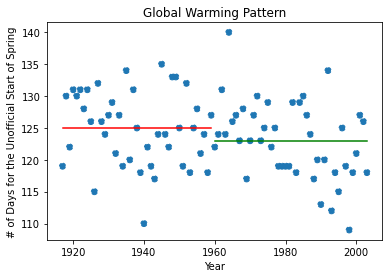

In [14]:
# Plot the number of days it took to get to spring each year from 1917-2004
# Plot the data mean number of days < 1960 and >= 1960.
# Notice how it took a bit less for 

plt.scatter(nenana["Year"], nenana["Spring_Days"],  linestyle='--')
plt.plot(range(1917, 2004), early_mean_list, color='r')
plt.plot(range(1917, 2004), late_mean_list, 'g')

plt.xlabel('Year')
plt.ylabel('# of Days for the Unofficial Start of Spring')
plt.title('Global Warming Pattern')

plt.show()

## Let's plot the data (2): Regression

We will be graphing our "Spring_Days" column again. Earlier, we used a rudimentary method of diving the dataset into two time frames and graphing two horizontal lines that describe the mean for each timeframe. This time, we will be drawing a regression line to see a better representation of the global warming trend.

In [15]:
x = nenana["Year"]
y = nenana["Spring_Days"]

coef = np.polyfit(x, y, 1)
func = np.poly1d(coef)

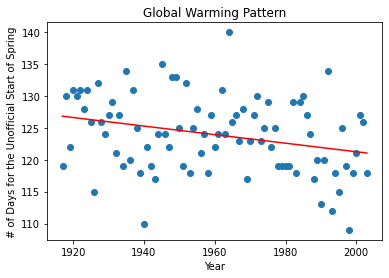

In [16]:
plt.scatter(x, y)
plt.plot(x, func(x), color='r')

plt.xlabel('Year')
plt.ylabel('# of Days for the Unofficial Start of Spring')
plt.title('Global Warming Pattern')

plt.show()

In [17]:
# Get the data points for the regression line from 1917-2003
m, b = coef
regression_list = []

for i in range(1917, 2004):
    regression_list.append(m*i + b)

residuals = np.array(nenana["Spring_Days"])-np.array(regression_list)

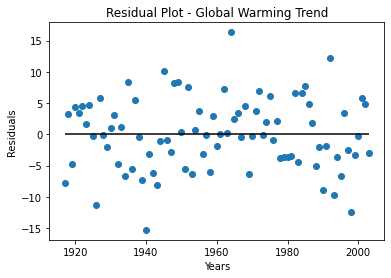

In [30]:
start_year = nenana["Year"][0]
end_year = nenana["Year"][len(nenana["Year"])-1]

plt.hlines(0, start_year, end_year, color="black")
plt.scatter(x, residuals)

plt.title("Residual Plot - Global Warming Trend")
plt.xlabel("Years")
plt.ylabel("Residuals")

plt.show()

In [19]:
correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r = correlation_xy

print("r^2:", round(r**2, 3))
print("r:", round(r, 3))

r^2: 0.081
r: -0.284
